<a href="https://colab.research.google.com/github/nadeeha/play-store-app-review-analysis/blob/main/CH_Nadeeha_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#lets import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams['figure.figsize'] = (13, 7)



#**Preliminary Analysis:**
Let's start by doing a basic EDA on each of the dataset provided - Play Store Data & User Reviews files.

1. EDA On **Play Store Dataset**

In [5]:
#read the dataset
df_play_store = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Python Module/Capstone Project/Play Store Data.csv')

In [5]:
#first few values of dataset
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
#statistical summary of dataset
df_play_store.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Inference from Preliminary Analysis:**
Except rating all other columns are in object datatype. There are null values present in the case of some columns which can be dealt with while considering each problem statement.

**VISUALISATION OF NULL VALUES:**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

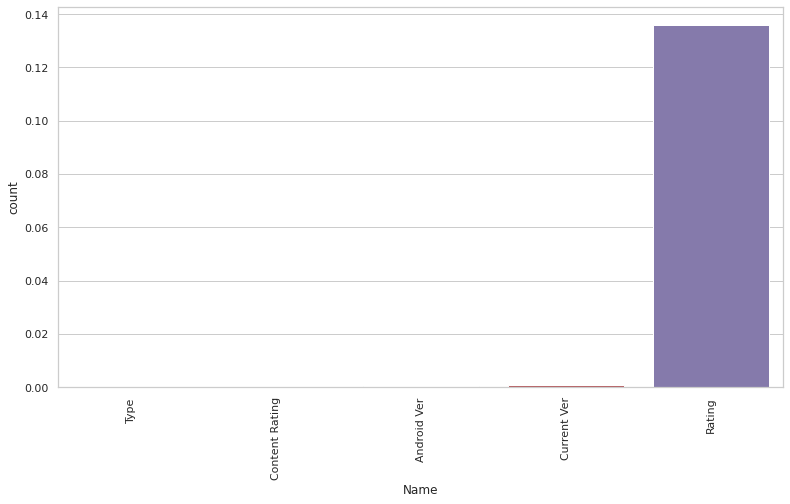

In [8]:
#here the missing values are visualised
missing_values = df_play_store.isnull().sum() / len(df_play_store)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

##**DATA PREPROCESSING**: Before any analysis, one of the most important task is to preprocess the data so that meaningful inferences can be deducted.

###Dealing with **duplicate values**

In [9]:
#check if df contains duplicates of rows
df_play_store[df_play_store.duplicated()]
df_play_store.duplicated().sum()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


483

In [10]:
df_play_store[df_play_store['App']=='Quick PDF Scanner + OCR FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


##**INFERENCE:** On checking for duplicates it was found that there were 483 duplicates. We can drop these to proceed with the analysis.

In [6]:
#drop duplicates
df_play_store = df_play_store.drop_duplicates()
df_play_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##**Analysis of Individual Columns & respective visualisations if any**
 
 

### 1. **App Column**: It contains the name of apps available in Playstore. 

In [12]:
#number of unique values in app column
df_play_store['App'].nunique()

9660

Only **9660 unique counts of Apps** are there, which means there are repetitions amongst these..

In [13]:
#name of apps having repetitions 
df_play_store['App'].value_counts()[:523]

ROBLOX                                       9
8 Ball Pool                                  7
Zombie Catchers                              6
Bubble Shooter                               6
Helix Jump                                   6
                                            ..
A&E - Watch Full Episodes of TV Shows        2
Hily: Dating, Chat, Match, Meet & Hook up    2
wetter.com - Weather and Radar               2
Monster High™                                2
Princess Coloring Book                       2
Name: App, Length: 523, dtype: int64

In [14]:
#checking with one of the repeated apps
df_play_store[df_play_store['App'] == 'ROBLOX'].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


**Inference:** On Checking with few of the columns, its seen that the only **column that varies is reviews**..

###2. **Size column:** Size column has the size of each apps in MB, KB units etc. It may have to be converted to float for further analysis.

In [15]:
#check for count of each values
df_play_store['Size'].value_counts()

Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
728k                     1
412k                     1
309k                     1
108k                     1
387k                     1
Name: Size, Length: 462, dtype: int64

**Inference:** Since there seems to be an ambiguity in the file size type units, it's better to dig up into the subsets and verify the units before moving further.

In [16]:
df_play_store[df_play_store['Size'].str.contains('M')][['Size']].head(3)

,Size
0,19M
1,14M
2,8.7M


In [17]:
df_play_store[df_play_store['Size']=='Varies with device'][['Size']].head(3)

,Size
37,Varies with device
42,Varies with device
52,Varies with device


In [18]:
df_play_store[df_play_store['Size'].str.contains('k')][['Size']].head(3)

,Size
58,201k
209,23k
384,79k


In [19]:
df_play_store[~((df_play_store['Size'].str.contains('M')) | (df_play_store['Size']=='Varies with device') | (df_play_store['Size'].str.contains('k')))][['Size']].head(3)

,Size
10472,"1,000+"


**Inference:**We can safely assume that the 4 formats of units are in **M,K,+**and some are tagged as **Varies with device**.

In [7]:
#A function is defined to account for these units so that it could be converted to float
def return_size_new(input_str):
  '''
  func to convert size
  '''
  if input_str[-1] == 'M':
    input_str =input_str.replace('M','e6')
  elif input_str[-1] == 'k':
    input_str=input_str.replace('k',',e3')
  elif input_str == 'Varies with device':
    input_str=input_str.replace('Varies with device','0')
  else:
    input_str =input_str.replace('+','')
  if input_str.find(','):
    input_str=input_str.replace(',','')
  return input_str

In [8]:
#func applied on each row
df_play_store['size_new'] = df_play_store['Size'].apply(lambda x: return_size_new(x))
df_play_store['size_new'] = df_play_store['size_new'].astype(float)
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000.0


In [38]:
#checking for various size formats value counts 
df_play_store['size_new'].value_counts()
bins = [0,1,1000000,10000000,100000000]
df_plot = df_play_store['size_new'].value_counts(bins=bins, sort=False).to_frame()
df_plot = df_plot.reset_index()
df_plot

0.0           1526
11000000.0     188
13000000.0     186
12000000.0     186
14000000.0     182
              ... 
429000.0         1
97000.0          1
412000.0         1
544000.0         1
811000.0         1
Name: size_new, Length: 461, dtype: int64

,index,size_new
0,"(-0.001, 1.0]",1526
1,"(1.0, 1000000.0]",322
2,"(1000000.0, 10000000.0]",3674
3,"(10000000.0, 100000000.0]",4836


###Plot 1: **Number of Apps** in different **file size range**

([<matplotlib.axis.XTick at 0x7f719e8c8250>,
 [Text(0, 0, 'Varies with Device'),
  Text(0, 0, '1KB-1MB'),
  Text(0, 0, '1MB-10MB'),
  Text(0, 0, '10MB-100MB')])

Text(0.5, 0, 'Size of App')

Text(0, 0.5, 'Number of Apps')

Text(0.5, 1.0, 'Number of Apps v/s Size of App')

<Figure size 576x360 with 0 Axes>

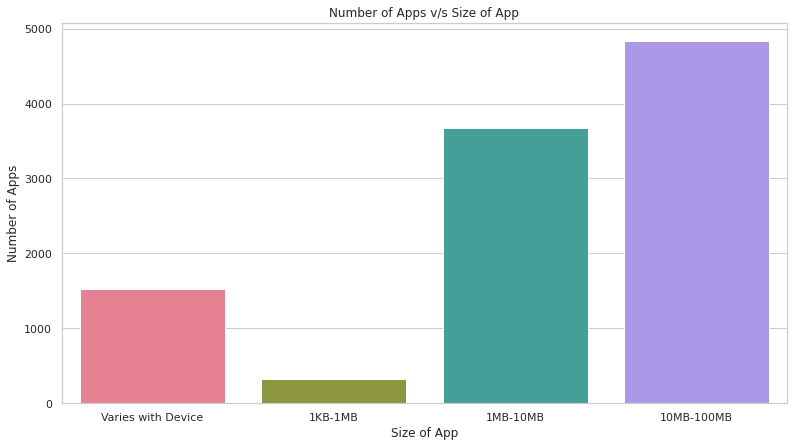

<Figure size 576x360 with 0 Axes>

In [23]:
ax = sns.barplot(y="size_new",x="index", data=df_plot, palette='husl')
positions = (0,1, 2, 3)
labels = ('Varies with Device','1KB-1MB','1MB-10MB','10MB-100MB')
plt.xticks(positions, labels)
plt.xlabel('Size of App')
plt.ylabel('Number of Apps')
plt.title('Number of Apps v/s Size of App')
plt.figure(figsize = (8,5))
plt.show()


In [24]:
df_play_store['size_new'].max(),df_play_store[df_play_store['size_new']!=0]['size_new'].min(),np.mean(df_play_store['size_new'])

(100000000.0, 1000.0, 18149494.06256034)

###2. **Installs column:** Install column has the number of installs for each app. The datatype is object and may have to convert to float for further processing.

In [25]:
#number of unique values and its count
df_play_store['Installs'].value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

##**Plot 2:** Number of Installs and its respective number of apps

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Number of Installs')

Text(0, 0.5, 'Number of apps')

Text(0.5, 1.0, 'Number of installs and respective number of apps')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

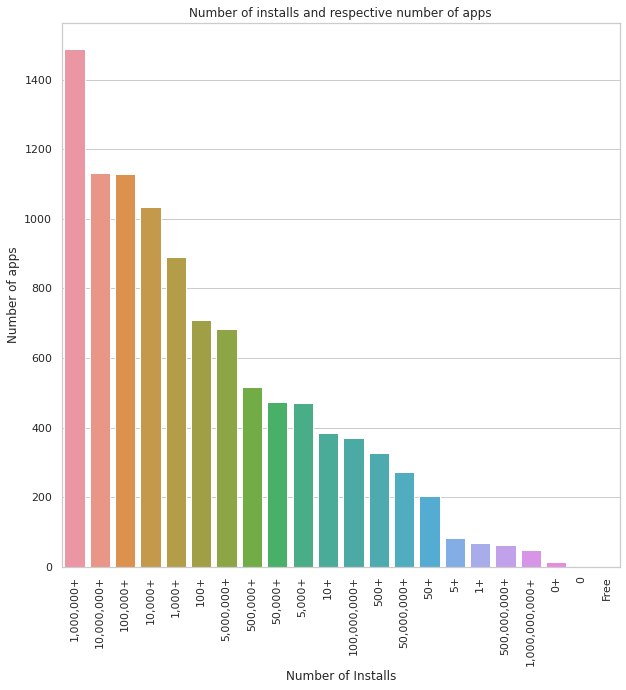

In [26]:
plt.figure(figsize = (10, 10))
sns.countplot(x="Installs", data=df_play_store,order=df_play_store.Installs.value_counts().index)
plt.xlabel('Number of Installs')
plt.ylabel('Number of apps')
plt.title('Number of installs and respective number of apps')
plt.xticks(rotation=90)

**Inference:** Around **1488** apps have more than **1,000,000+** downloads

##**Plot 3:** Histogram plot of number of installs v/s number of apps

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of installs and density')

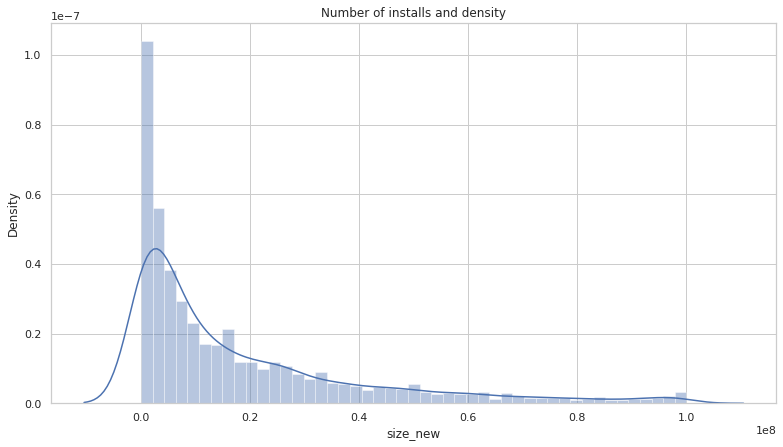

In [27]:
#hist plot of number of installa and its respective count
sns.distplot(df_play_store['size_new'], hist=True)
plt.title('Number of installs and density')

In [9]:
#function to change the installs num to float by 
def change_installs_num(input_str):
  if input_str[-1] == '+':
    input_str =input_str.replace('+','')
  elif input_str == 'Free':
    input_str = '-1'
  if input_str.find(','):
    input_str=input_str.replace(',','')
  return input_str
df_play_store['installs_new'] = df_play_store['Installs'].apply(lambda x: change_installs_num(x))

In [10]:
df_play_store['installs_new'] = df_play_store['installs_new'].astype(float)
df_play_store[['installs_new','Installs']].head(4)

,installs_new,Installs
0,10000.0,"10,000+"
1,500000.0,"500,000+"
2,5000000.0,"5,000,000+"
3,50000000.0,"50,000,000+"


In [ ]:
df_play_store['installs_new'].describe().apply(lambda x: '%.5f' % x)

###4. **Type Columns:** Type column tells if the app is free or paid.Has one null value.

In [41]:
#value count of type column 
df_play_store.Type.value_counts()

Free    9591
Paid     765
0          1
Name: Type, dtype: int64

In [42]:
df_plot_new= df_play_store[['Type']]
df_plot_new[df_plot_new.isnull().any(axis=1)]

,Type
9148,NaN


In [43]:
df_plot_new[df_plot_new['Type']=='0']

,Type
10472,0


In [44]:
#dropping null and 0
df_plot_new = df_plot_new.drop(labels=[9148,10472],axis=0)


**Inference:** from the info there was **one null value** and on looking onto it there was another category** 0**, both of which could be dropped

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Type of App - Paid/Free')

Text(0, 0.5, 'Number of apps')

Text(0.5, 1.0, 'Type v/s number of apps')

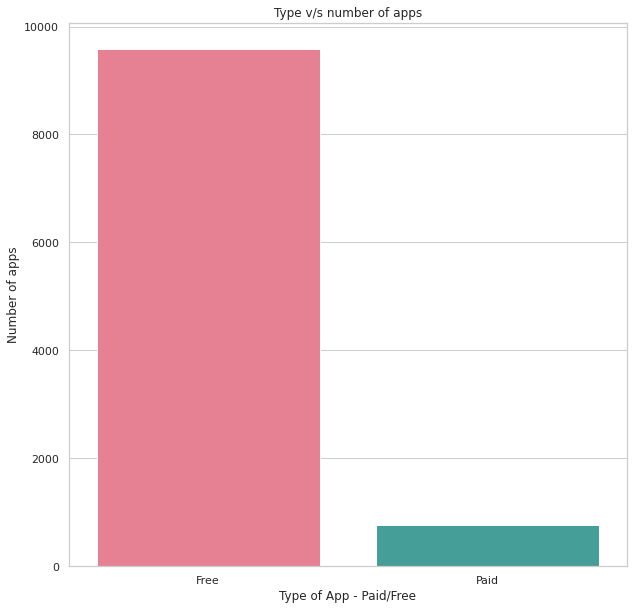

In [45]:
#countplot for type V/s number of apps
plt.figure(figsize = (10, 10))
sns.countplot(x="Type", data=df_plot_new,order=df_plot_new.Type.value_counts().index,palette='husl')
plt.xlabel('Type of App - Paid/Free')
plt.ylabel('Number of apps')
plt.title('Type v/s number of apps')

In [11]:
#converted type to 1 Free, 2-- Paid for finding correlations
def type_encoder(Type):
  if Type == 'Free':
    Type = '1'
  elif Type == 'Paid':
    Type = '2'
  
  return Type
df_play_store['type_encoded'] = df_play_store['Type'].apply(lambda x: type_encoder(x))
df_play_store['type_encoded'] = df_play_store['type_encoded'].astype(float)

###5. **Category Column:**Category column has the different categories of apps.No null values.

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Number of apps')

Text(0.5, 1.0, 'Category and respective number of apps')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

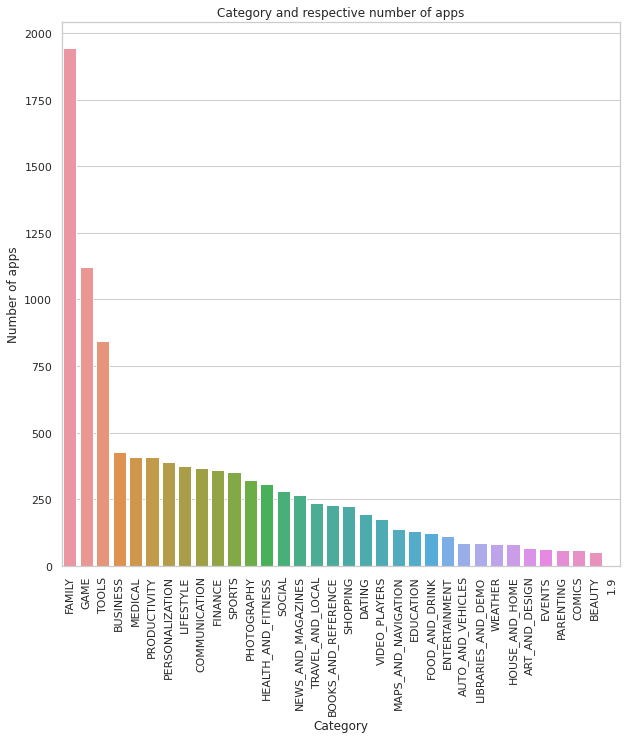

In [47]:
#plot of number of apps in each category 
plt.figure(figsize = (10, 10))
sns.countplot(x="Category", data=df_play_store,order=df_play_store.Category.value_counts().index)
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Category and respective number of apps')
plt.xticks(rotation=90)

##Two column pair wise analysis
Finding if there are any correlations within the data

In [51]:
corr_df=df_play_store.corr()
corr_df

,Rating,size_new,installs_new,type_encoded
Rating,1.000000,0.042629,0.048147,0.023821
size_new,0.042629,1.000000,0.000298,-0.010871
installs_new,0.048147,0.000298,1.000000,-0.049408
type_encoded,0.023821,-0.010871,-0.049408,1.000000


<Figure size 720x360 with 0 Axes>

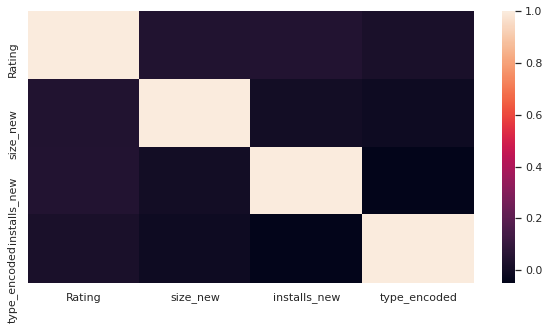

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

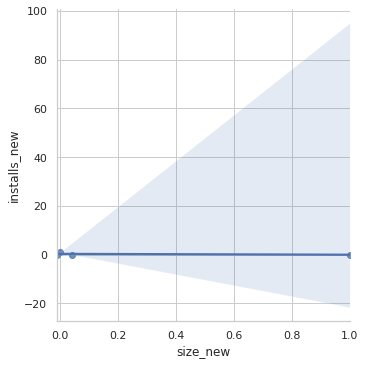

In [54]:
sns.lmplot(x='size_new', y='installs_new', data=corr_df, fit_reg=True)

**Inference:**Very low or **negligible correlations** only

Category with number of apps

##**Top categories, apps** based on other columns

Categories with most number of installs

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Number of installs')

Text(0.5, 1.0, 'Top 10 category based on number of installs')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

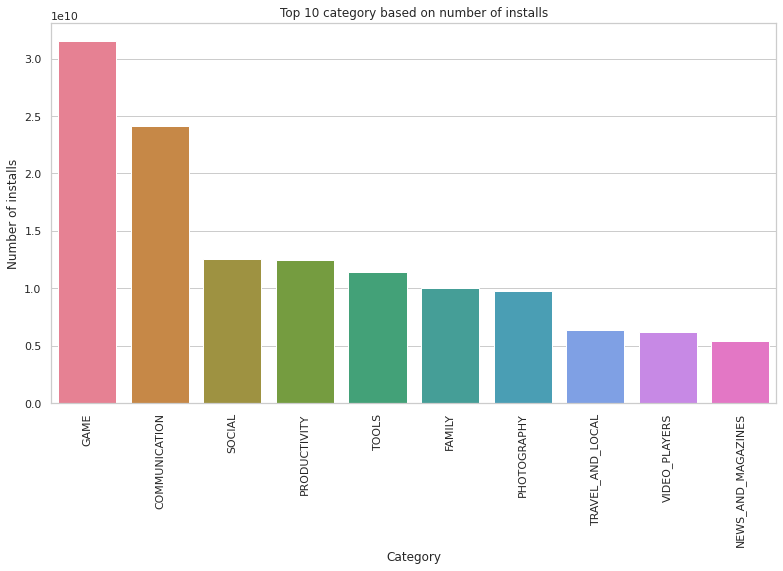

In [68]:
df_top_cat = df_play_store.groupby(['Category']).agg({'installs_new':'sum'}).reset_index().sort_values(by='installs_new',ascending=False)[:10]
sns.barplot(x="Category", y="installs_new",data=df_top_cat,palette='husl')
plt.xlabel('Category')
plt.ylabel('Number of installs')
plt.title('Top 10 category based on number of installs')
plt.xticks(rotation=90)



Text(0.5, 0, 'Category')

Text(0, 0.5, 'Avg Size')

Text(0.5, 1.0, 'Top 10 category having large size')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

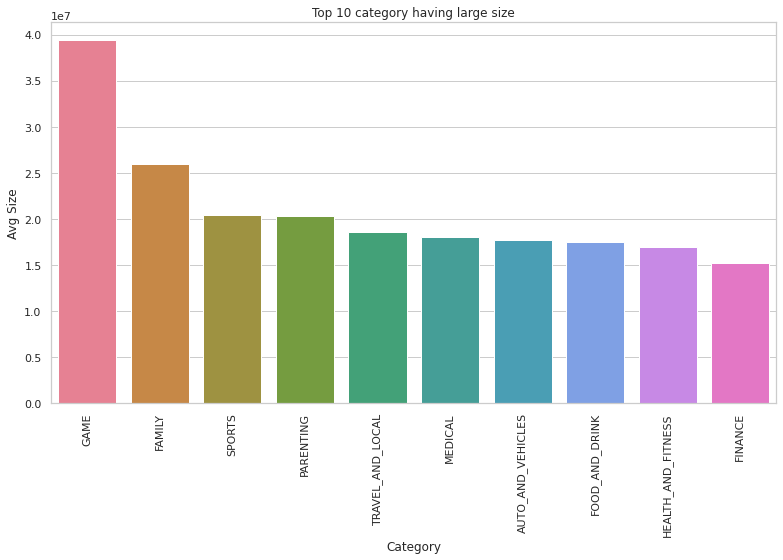

In [69]:
df_top_cat = df_play_store.groupby(['Category']).agg({'size_new':'mean'}).reset_index().sort_values(by='size_new',ascending=False)[:10]
sns.barplot(x="Category", y="size_new",data=df_top_cat,palette='husl')
plt.xlabel('Category')
plt.ylabel('Avg Size')
plt.title('Top 10 category having high mean size')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

Text(0.5, 1.0, 'Top 30 Free apps with most downloads')

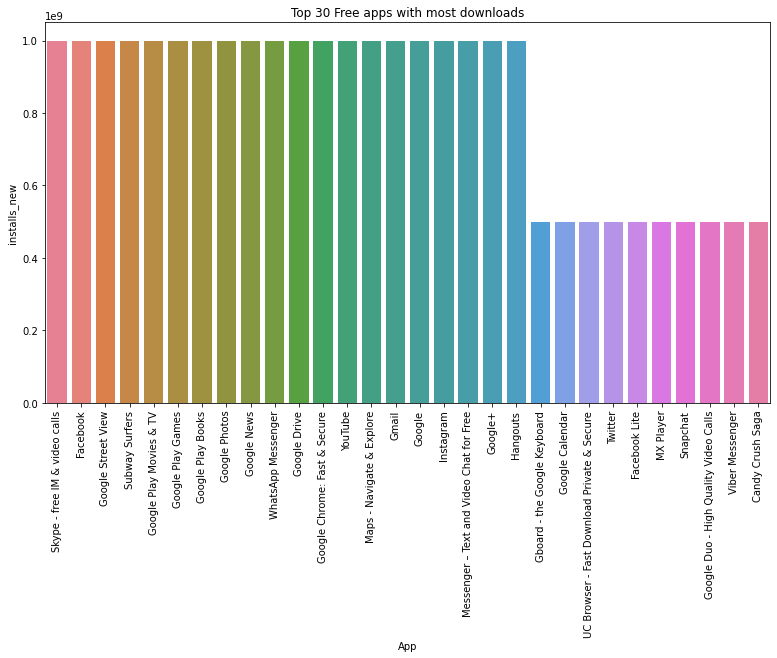

In [15]:
df_top_app = df_play_store.groupby(['App','Type','installs_new'])['installs_new'].mean().to_frame()
df_top_app.index.names=['App','Type','install']
df_top_app= df_top_app.reset_index()
df_top_app = df_top_app[df_top_app['Type']=='Free'].sort_values(by='installs_new',ascending=False)[:30]
ax = sns.barplot(x="App", y="installs_new", data=df_top_app,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Top 30 Free apps with most downloads')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

Text(0.5, 1.0, 'Top 30 Paid apps with most downloads')

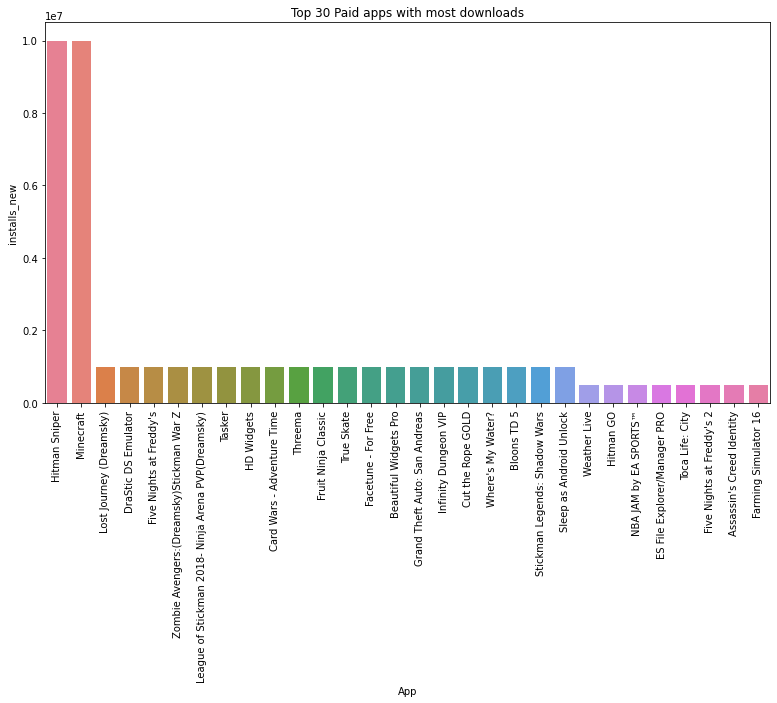

In [17]:
df_top_app = df_play_store.groupby(['App','Type','installs_new'])['installs_new'].mean().to_frame()
df_top_app.index.names=['App','Type','install']
df_top_app= df_top_app.reset_index()
df_top_app = df_top_app[df_top_app['Type']=='Paid'].sort_values(by='installs_new',ascending=False)[:30]
ax = sns.barplot(x="App", y="installs_new", data=df_top_app,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Top 30 Paid apps with most downloads')

Text(0.5, 0, 'App')

Text(0, 0.5, 'Size')

Text(0.5, 1.0, 'Top 10 apps based on size')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

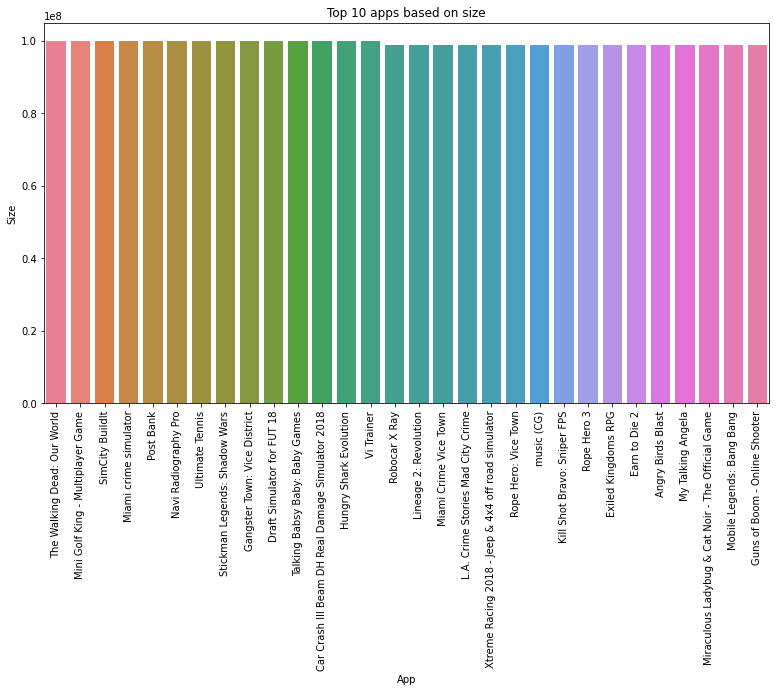

In [24]:
df_top_cat = df_play_store.groupby(['App']).agg({'size_new':'max'}).reset_index().sort_values(by='size_new',ascending=False)[:30]
sns.barplot(x="App", y="size_new",data=df_top_cat,palette='husl')
plt.xlabel('App')
plt.ylabel('Size')
plt.title('Top 30 apps based on size')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

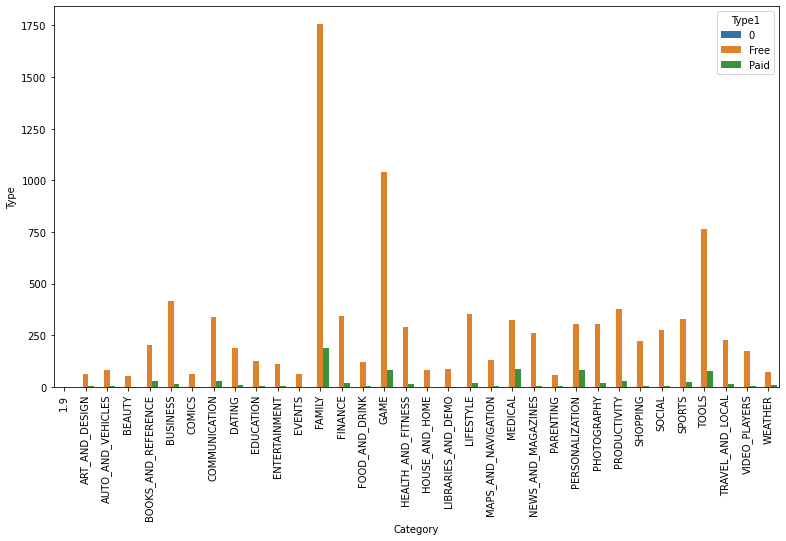

In [25]:

df = df_play_store.groupby(['Category','Type'])['Type'].count().to_frame()

df.index.names=['Category','Type1']
df = df.reset_index()

ax = sns.barplot(x="Category", y="Type", hue="Type1", data=df,)
plt.xticks(rotation=90)

Ratings and count

In [28]:
df_ratings = df_play_store[['Rating','App','Category']]

In [29]:
def rat_to_words(input_ratings):
  if input_ratings >= 4:
    return 'Best Rated'
  elif (input_ratings >= 3) and (input_ratings < 4):
    return 'Average Rated'
  else:
    return 'Worst Rated'

In [30]:
df_ratings.info()
df_ratings = df_ratings.dropna()
df_ratings = df_ratings.drop_duplicates()
df_ratings['Rating_Class'] = df_ratings['Rating'].apply(lambda x: rat_to_words(x) )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    8893 non-null   float64
 1   App       10358 non-null  object 
 2   Category  10358 non-null  object 
dtypes: float64(1), object(2)
memory usage: 323.7+ KB


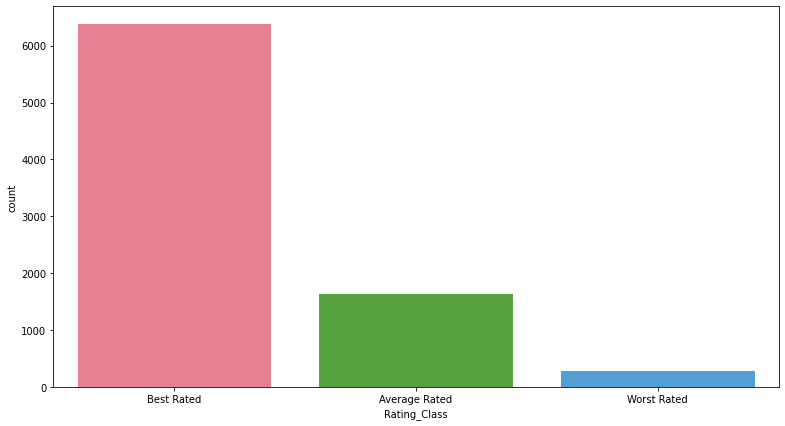

In [31]:
ax = sns.countplot(x="Rating_Class", data=df_ratings, palette='husl')

User review dataset EDA

In [ ]:
df_user_rating = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Python Module/Capstone Project/User Reviews.csv')

In [ ]:
df_user_rating.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_user_rating.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Bowmasters,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


#Single column wise analysis

1. App: Column with names of the app

--column with 1 null value
